<a href="https://colab.research.google.com/github/navyamodi30/T2/blob/main/T2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_csv('/content/train.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

M

<ipython-input-2-047cc5b595fe>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-2-047cc5b595fe>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

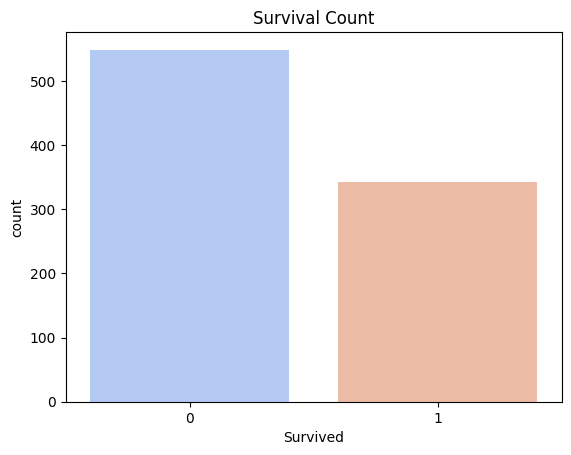

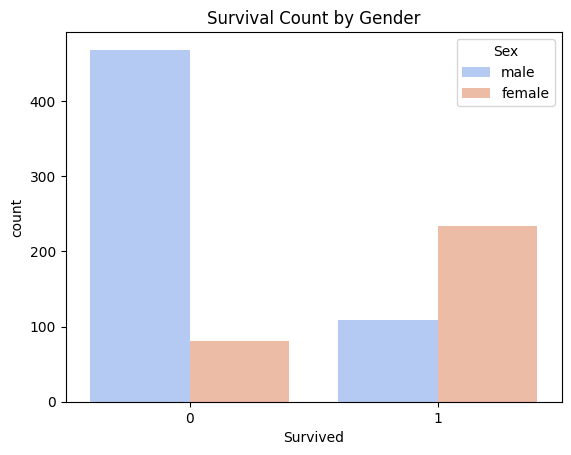

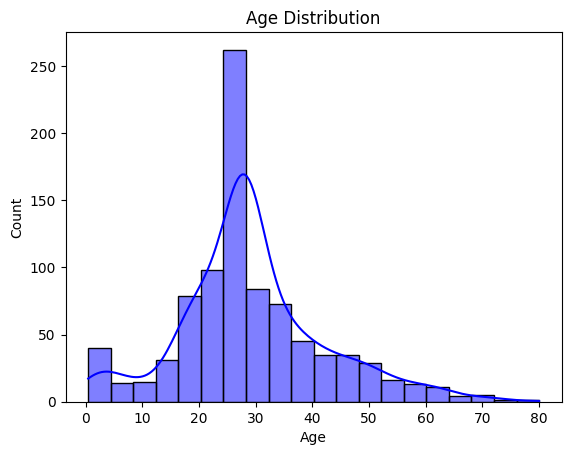

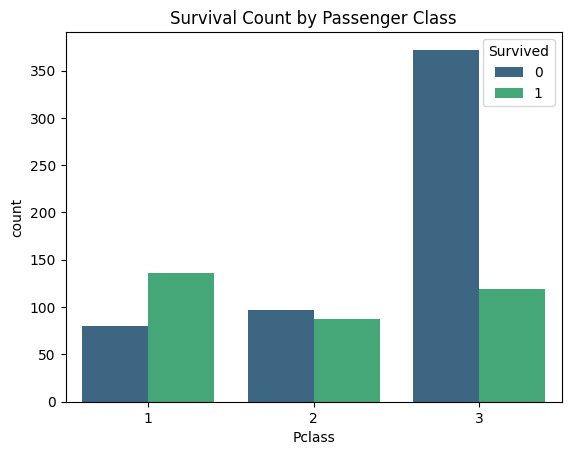

<ipython-input-2-047cc5b595fe>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=data, palette='coolwarm')


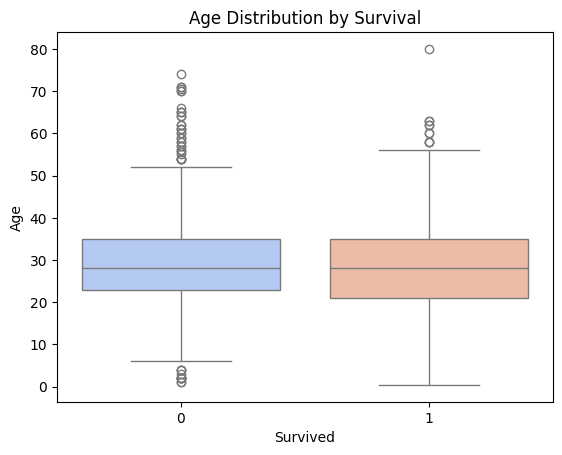

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 800x600 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('train.csv')

print(data.head())

print("\nMissing values:\n", data.isnull().sum())

# Fill missing Age with median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked with the most common value
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop Cabin column due to a large number of missing values
data.drop(columns=['Cabin'], inplace=True)

# Verify no missing values remain
print("\nMissing values after cleaning:\n", data.isnull().sum())

# 2. Exploratory Data Analysis (EDA)

# Summary statistics
print("\nSummary statistics:\n", data.describe())

# Distribution of survived and non-survived passengers
sns.countplot(x='Survived', data=data, palette='coolwarm')
plt.title('Survival Count')
plt.show()

# Gender-wise survival
sns.countplot(x='Survived', hue='Sex', data=data, palette='coolwarm')
plt.title('Survival Count by Gender')
plt.show()

# Age distribution
sns.histplot(data['Age'], bins=20, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=data, palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.show()

# Boxplot of Age by Survival
sns.boxplot(x='Survived', y='Age', data=data, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot for selected features
selected_features = ['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
sns.pairplot(data[selected_features], hue='Survived', palette='coolwarm')
plt.show()

# Pivot table for survival rates
survival_rates = data.pivot_table(index='Pclass', columns='Sex', values='Survived', aggfunc='mean')
print("\nSurvival Rates:\n", survival_rates)

# Fare distribution
sns.histplot(data['Fare'], bins=20, kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()
